# Exploring the Airbnb data  of Buenos Aires, Argentina

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/My Drive/Data Science/Udacity Nanodegree/airbnb_buenos_aires'
#path =  './data'

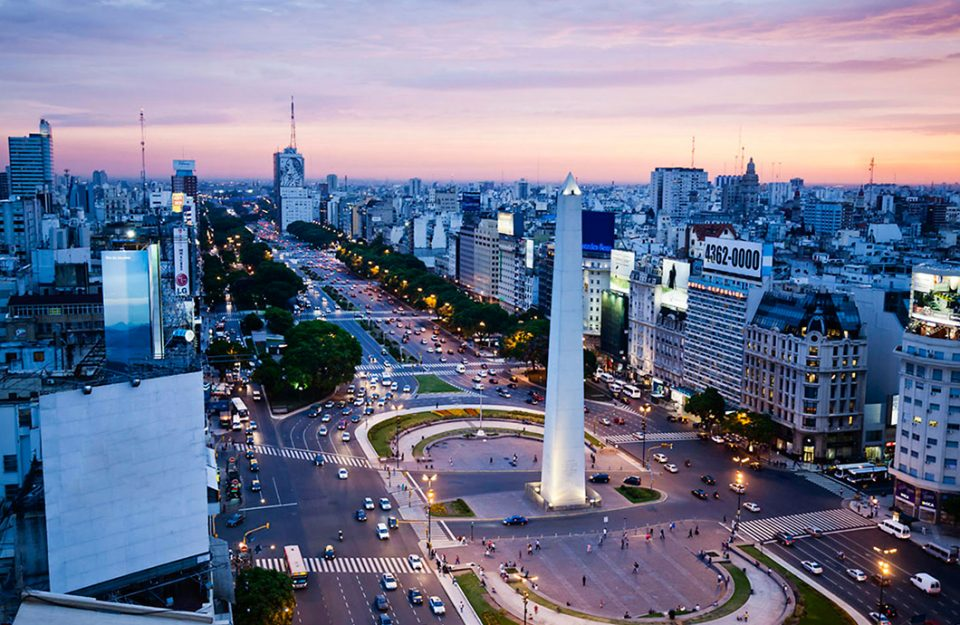

In [3]:
from IPython.display import Image
Image(filename= path+ '/images/buenos_aires_background.jpg') 

In the following notebook the AirBnB possibilities in Buenos Aires, Argentina, will be what is ofered and research how the location and season of the year influencie the price.

The dataset is a picture of all available AirBnB listings in Buenos Aires, Argentina at the 15 March, 2019. Additionaly, the correspondings booking calendar is provided from 23 February, 2021 until one year into the future.

In this notebook, the goal is to make the process of CRISP-DM with the datasets of Airbnb, Buenos Aires, availables on: http://insideairbnb.com/get-the-data.html

It's is separated in four steps, they are:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Results

## Business Understanding

Buenos Aires is one of the most visited cities in the world, if we consider only latin america, is the top three cities.
Below, we have some question that everyone who wants to travel to somewhere wuold like to know before booking a place.

1. What's the most common acomodation per type of room?
2. What's the most frequency neighborhood?
3. How's the interaction between price and type of accomodation?
4. How's the interaction between price and location?
5. What's the best period of the year to travel to Buenos Aires?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## Data Understanding

In the following section covers the exploration of all datasets avaiables. There are four ".csv" files. They are: listings.csv, reviews.csv, neighborood.csv and calendar.csv.

Now, we let's explore which one individually. 

### Listings

Description: Summary information and metrics for listings in Buenos Aires (good for visualisations).

In [5]:
df_listings = pd.read_csv(path+ '/data/listings.csv')
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6283,Casa Al Sur,13310,Pamela,NaN,Balvanera,-34.60367,-58.40875,Entire home/apt,4473,3,1,2011-01-31,0.01,1,365
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,5368,2,26,2019-11-28,0.25,1,327
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,2415,1,20,2017-12-11,0.15,1,365
3,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2684,1,1,2018-12-18,0.04,7,365
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2684,1,0,NaN,NaN,7,365


In [6]:
df_listings.shape

(20243, 16)

In [7]:
df_listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.024300e+04,2.024300e+04,0.0,20243.000000,20243.000000,2.024300e+04,20243.000000,20243.000000,14032.000000,20243.000000,20243.000000
mean,2.814316e+07,1.075708e+08,NaN,-34.592497,-58.415163,5.172270e+03,6.586870,16.280097,0.671542,7.382651,226.623771
std,1.363630e+07,1.051090e+08,NaN,0.017958,0.029515,6.713130e+04,20.817938,33.464033,0.803501,16.704003,133.867058
min,6.283000e+03,2.616000e+03,NaN,-34.697370,-58.530720,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.845333e+07,1.403147e+07,NaN,-34.603040,-58.434500,1.612000e+03,2.000000,0.000000,0.130000,1.000000,89.000000
50%,3.135076e+07,6.764858e+07,NaN,-34.591680,-58.414350,2.507000e+03,3.000000,3.000000,0.370000,2.000000,242.000000
75%,3.936798e+07,1.877499e+08,NaN,-34.582140,-58.391345,4.030000e+03,5.000000,17.000000,0.920000,4.000000,364.000000
max,4.829232e+07,3.896516e+08,NaN,-34.535660,-58.355410,8.946021e+06,1100.000000,500.000000,7.140000,124.000000,365.000000


In [8]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20243 entries, 0 to 20242
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20243 non-null  int64  
 1   name                            20238 non-null  object 
 2   host_id                         20243 non-null  int64  
 3   host_name                       20236 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   20243 non-null  object 
 6   latitude                        20243 non-null  float64
 7   longitude                       20243 non-null  float64
 8   room_type                       20243 non-null  object 
 9   price                           20243 non-null  int64  
 10  minimum_nights                  20243 non-null  int64  
 11  number_of_reviews               20243 non-null  int64  
 12  last_review                     

Columns with null values: 
['name', 'host_name', 'neighbourhood_group', 'last_review', 'reviews_per_month'] 

Count of null values per column: 
 id                                    0
name                                  5
host_id                               0
host_name                             7
neighbourhood_group               20243
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6211
reviews_per_month                  6211
calculated_host_listings_count        0
availability_365                      0
dtype: int64 


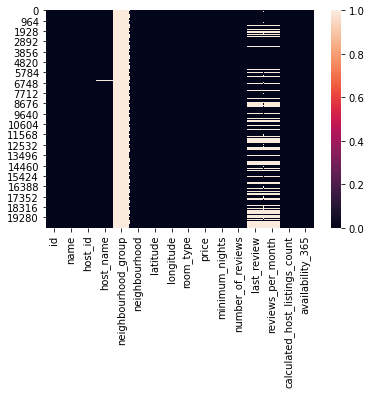

In [9]:
print('Columns with null values: \n{} \n'.format(list(df_listings.columns[df_listings.isnull().sum()>0])))

print('Count of null values per column: \n {} '.format(np.sum(df_listings.isnull())))

sns.heatmap(df_listings.isnull()) # checking for null values

In [10]:
df_listings.id.is_unique

True

The listings datasets will be excelent because the column, called id, has unique values and all places to book.

### Reviews

Description: Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).

In [11]:
df_reviews = pd.read_csv(path+ '/data/reviews.csv')
df_reviews.head()

,listing_id,date
0,6283,2011-01-31
1,11508,2012-07-02
2,11508,2012-12-26
3,11508,2013-01-05
4,11508,2013-07-28


In [12]:
df_reviews.shape

(329558, 2)

### Neighbourhoods

Description: Neighbourhood list for geo filter. Sourced from city or open source GIS files.



In [13]:
df_neighbourhoods = pd.read_csv(path+ '/data/neighbourhoods.csv')
df_neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Agronomia
1,NaN,Almagro
2,NaN,Balvanera
3,NaN,Barracas
4,NaN,Belgrano


In [14]:
df_neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        49 non-null     object 
dtypes: float64(1), object(1)
memory usage: 912.0+ bytes


In [15]:
df_neighbourhoods.shape

(49, 2)

As we can see above, this dataset won't be useful, in order to the column, called neighbourhood_group, has all rows nulls.

### Calendar

Description: Detailed Calendar Data for listings in Buenos Aires



In [16]:
df_calendar = pd.read_csv(path+ '/data/calendar.csv')
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6283,2021-02-24,t,"$4,473.00","$4,473.00",3.0,30.0
1,53097,2021-02-24,f,"$3,578.00","$3,578.00",2.0,1125.0
2,53097,2021-02-25,f,"$3,578.00","$3,578.00",2.0,1125.0
3,53097,2021-02-26,f,"$3,578.00","$3,578.00",2.0,1125.0
4,53097,2021-02-27,f,"$3,578.00","$3,578.00",2.0,1125.0


In [17]:
df_calendar.shape

(7389042, 7)

In [18]:
df_calendar["price"] = df_calendar[["price"]].replace("[\$,]", "", regex=True).astype(float)
df_calendar["adjusted_price"] = df_calendar[["adjusted_price"]].replace("[\$,]", "", regex=True).astype(float)
df_calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6283,2021-02-24,t,4473.0,4473.0,3.0,30.0
1,53097,2021-02-24,f,3578.0,3578.0,2.0,1125.0
2,53097,2021-02-25,f,3578.0,3578.0,2.0,1125.0


In [19]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7389042 entries, 0 to 7389041
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 394.6+ MB


After analysing all datasets. Only the "listings.csv" and "calendar.csv" will be necessary to solve the business problem.

## Prepare Data

In [20]:
df_listings = df_listings.drop(columns=['neighbourhood_group'])

Removing the column because there isn't information.

In [21]:
df_calendar["price"] = df_calendar["price"].replace("[\$,]", "", regex = True).astype(float)

Formating the column price to float.

## Results

### 1. What's the most common acomodation per type of room?

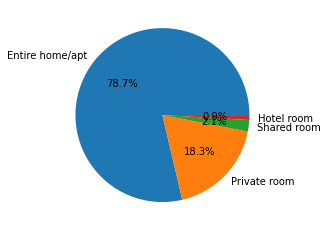

Entire home/apt    15924
Private room        3702
Shared room          433
Hotel room           184
Name: room_type, dtype: int64

In [22]:
mylabels = list(df_listings['room_type'].value_counts().index)
plt.pie(df_listings['room_type'].value_counts(), labels=mylabels, autopct='%1.1f%%')
plt.savefig(path+ "/images/distribuition_per_room_type.png")
plt.show()

df_listings['room_type'].value_counts()

In [23]:
print((df_listings['room_type'].value_counts() / df_listings.shape[0]))

Entire home/apt    0.786642
Private room       0.182878
Shared room        0.021390
Hotel room         0.009090
Name: room_type, dtype: float64


**Answer:** 

With the plot above, the analysis is about the type of room, with the entire home/apt representing 78.7%.

## 2. What's the most frequency neighborhood?

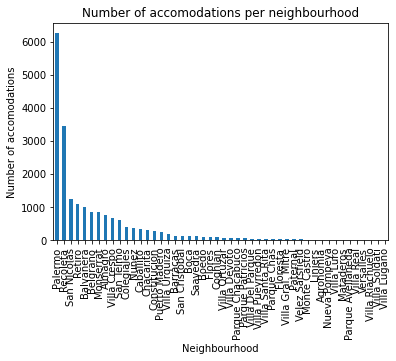

In [24]:
(df_listings['neighbourhood'].value_counts()).plot(kind = "bar");
plt.title("Number of accomodations per neighbourhood");
plt.xlabel("Neighbourhood");
plt.ylabel("Number of accomodations");

Because of a large number of neighbourhoods, the plot below focuses only on the top 10 more frequency places.

Percent of total dataframe: 82.90% 



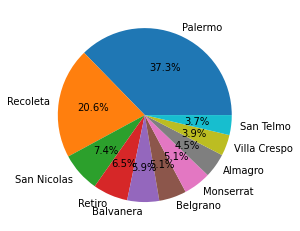

Palermo         6258
Recoleta        3457
San Nicolas     1234
Retiro          1091
Balvanera        995
Belgrano         857
Monserrat        855
Almagro          758
Villa Crespo     655
San Telmo        621
Name: neighbourhood, dtype: int64

In [25]:
percent_of_total = (df_listings['neighbourhood'].value_counts()[:10].sum())/df_listings['neighbourhood'].value_counts().sum()*100

print('Percent of total dataframe: {:.2f}% \n'.format(percent_of_total))

mylabels = list(df_listings['neighbourhood'].value_counts()[:10].index)
plt.pie(df_listings['neighbourhood'].value_counts()[:10], labels=mylabels, autopct='%1.1f%%')
plt.savefig("/content/drive/My Drive/Data Science/Udacity Nanodegree/airbnb_buenos_aires/images/distribuition_per_neighbourhood.png")
plt.show()
df_listings['neighbourhood'].value_counts()[:10]

**Answer:** 

According to the plot above, we can see that the top 10 neighbourhoods correspond to more than 80% of accommodations, Palermo and Recoleta for almost 60%, which shows us a very concentrated amount of bookings in those areas.


## 3. How's the interaction between price and type of accomodation? 

In [26]:
print('The average price is: {:,.2f} '.format(df_listings.price.sum()/(df_listings.shape[0])))

The average price is: 5,172.27 


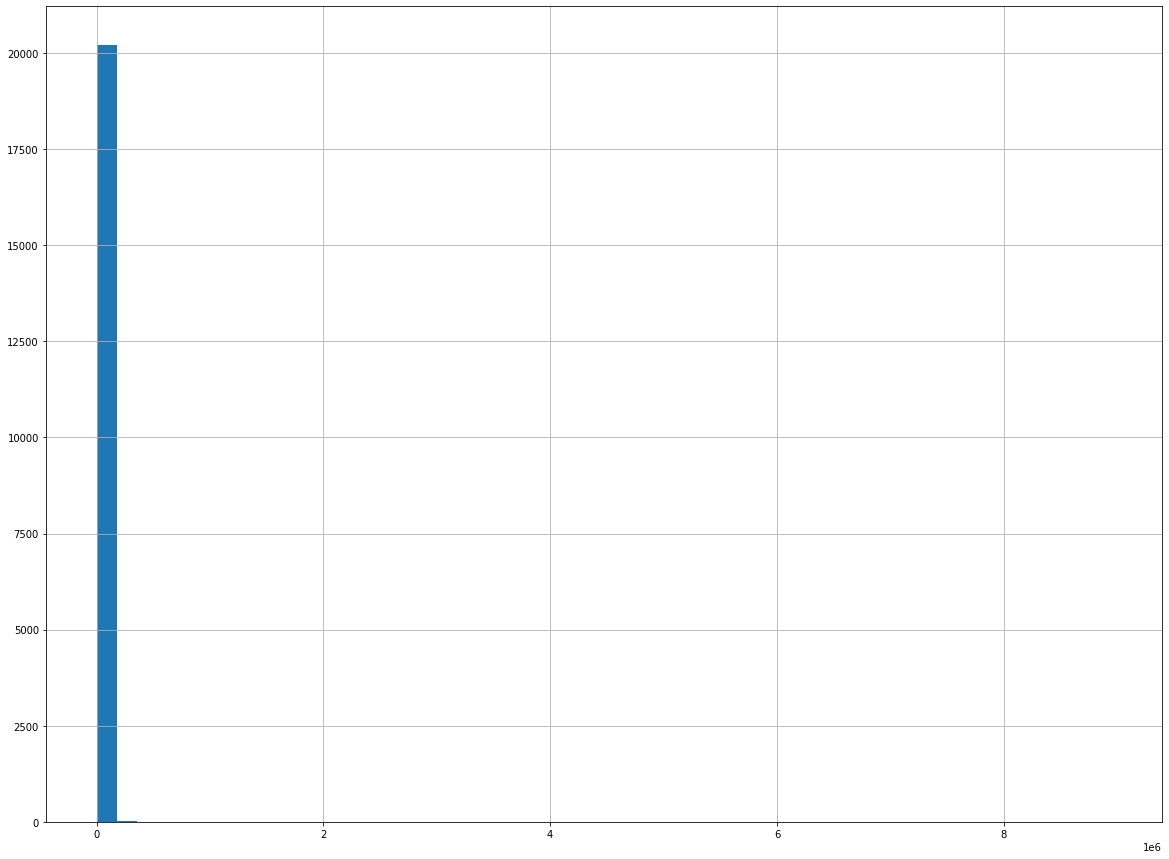

In [27]:
df_listings['price'].hist(bins=50, figsize=(20,15))
plt.show()

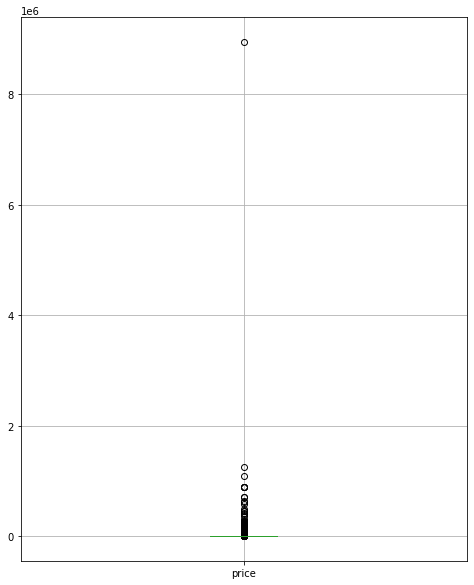

In [28]:
df_listings.boxplot(column = ["price"], figsize = (8,10));

As we can see, the dataset is very skewed. So, to solve this, we need to remove the outliers.

In [29]:
df_listings_without_outliers = df_listings[df_listings['price']<10000]

In [30]:
print('Now, the dataframe has {:.2f} of the original data'.format(df_listings_without_outliers.shape[0]/df_listings.shape[0]))

Now, the dataframe has 0.95 of the original data


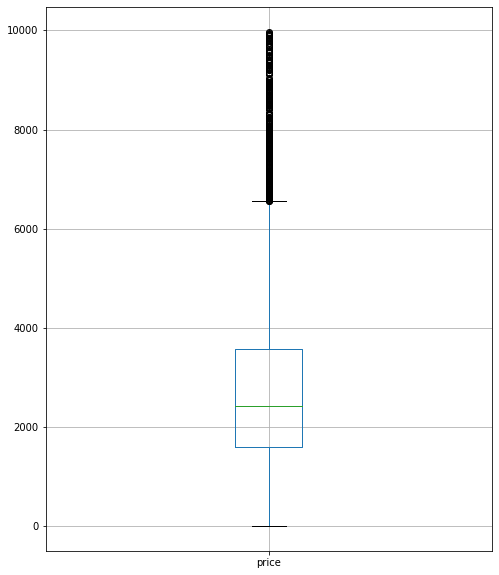

In [31]:
df_listings_without_outliers.boxplot(column = ["price"], figsize = (8,10));

In [32]:
print('The average price without outliers is: {:,.2f} '.format(df_listings_without_outliers.price.sum()/(df_listings.shape[0])))

The average price without outliers is: 2,790.35 


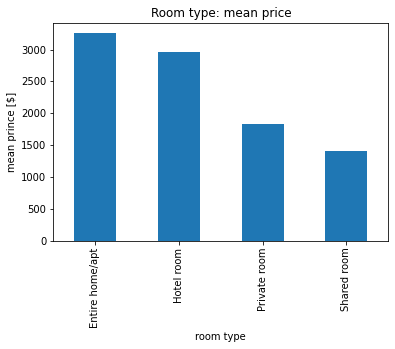

In [33]:
# bar chart: room type mean prices
(df_listings_without_outliers.groupby("room_type").mean()["price"].sort_values(ascending=False)).plot(kind = "bar");
plt.title("Room type: mean price");
plt.xlabel("room type");
plt.ylabel("mean prince [$]");
plt.savefig(path+ "/images/room_type_vs_price.png")

In [34]:
print("Data frame without otliers \n{}\n\n Original dataframe \n{}" .format(df_listings_without_outliers.groupby("room_type").mean()["price"].sort_values(ascending=False),df_listings.groupby("room_type").mean()["price"].sort_values(ascending=False)))

Data frame without otliers 
room_type
Entire home/apt    3251.835552
Hotel room         2968.468354
Private room       1836.180470
Shared room        1401.436019
Name: price, dtype: float64

 Original dataframe 
room_type
Hotel room         64067.266304
Shared room         5046.621247
Entire home/apt     5001.758917
Private room        2993.164506
Name: price, dtype: float64


**Answer:** 

In this question, we could analysi the price. The first thing necessary to do was remove the outliers, for the reason that it was distorcing the mean and all values, as the image of the first boxplot shows.

Following this treatment, about the type of room analysis, the shared types of booking as private room and shared room are cheaper than the other, it is almost half of the average price.

## 4. How's the interaction between price and location?

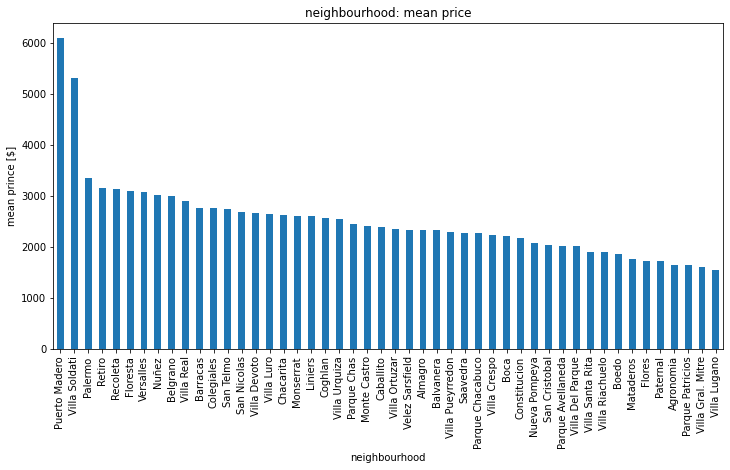

In [35]:
# bar chart: neighbourhood mean prices
plt.figure(figsize=(12,6))
(df_listings_without_outliers.groupby("neighbourhood").mean()["price"].sort_values(ascending=False)).plot(kind = "bar");
plt.title("neighbourhood: mean price");
plt.xlabel("neighbourhood");
plt.ylabel("mean prince [$]");

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 1368x1368 with 0 Axes>

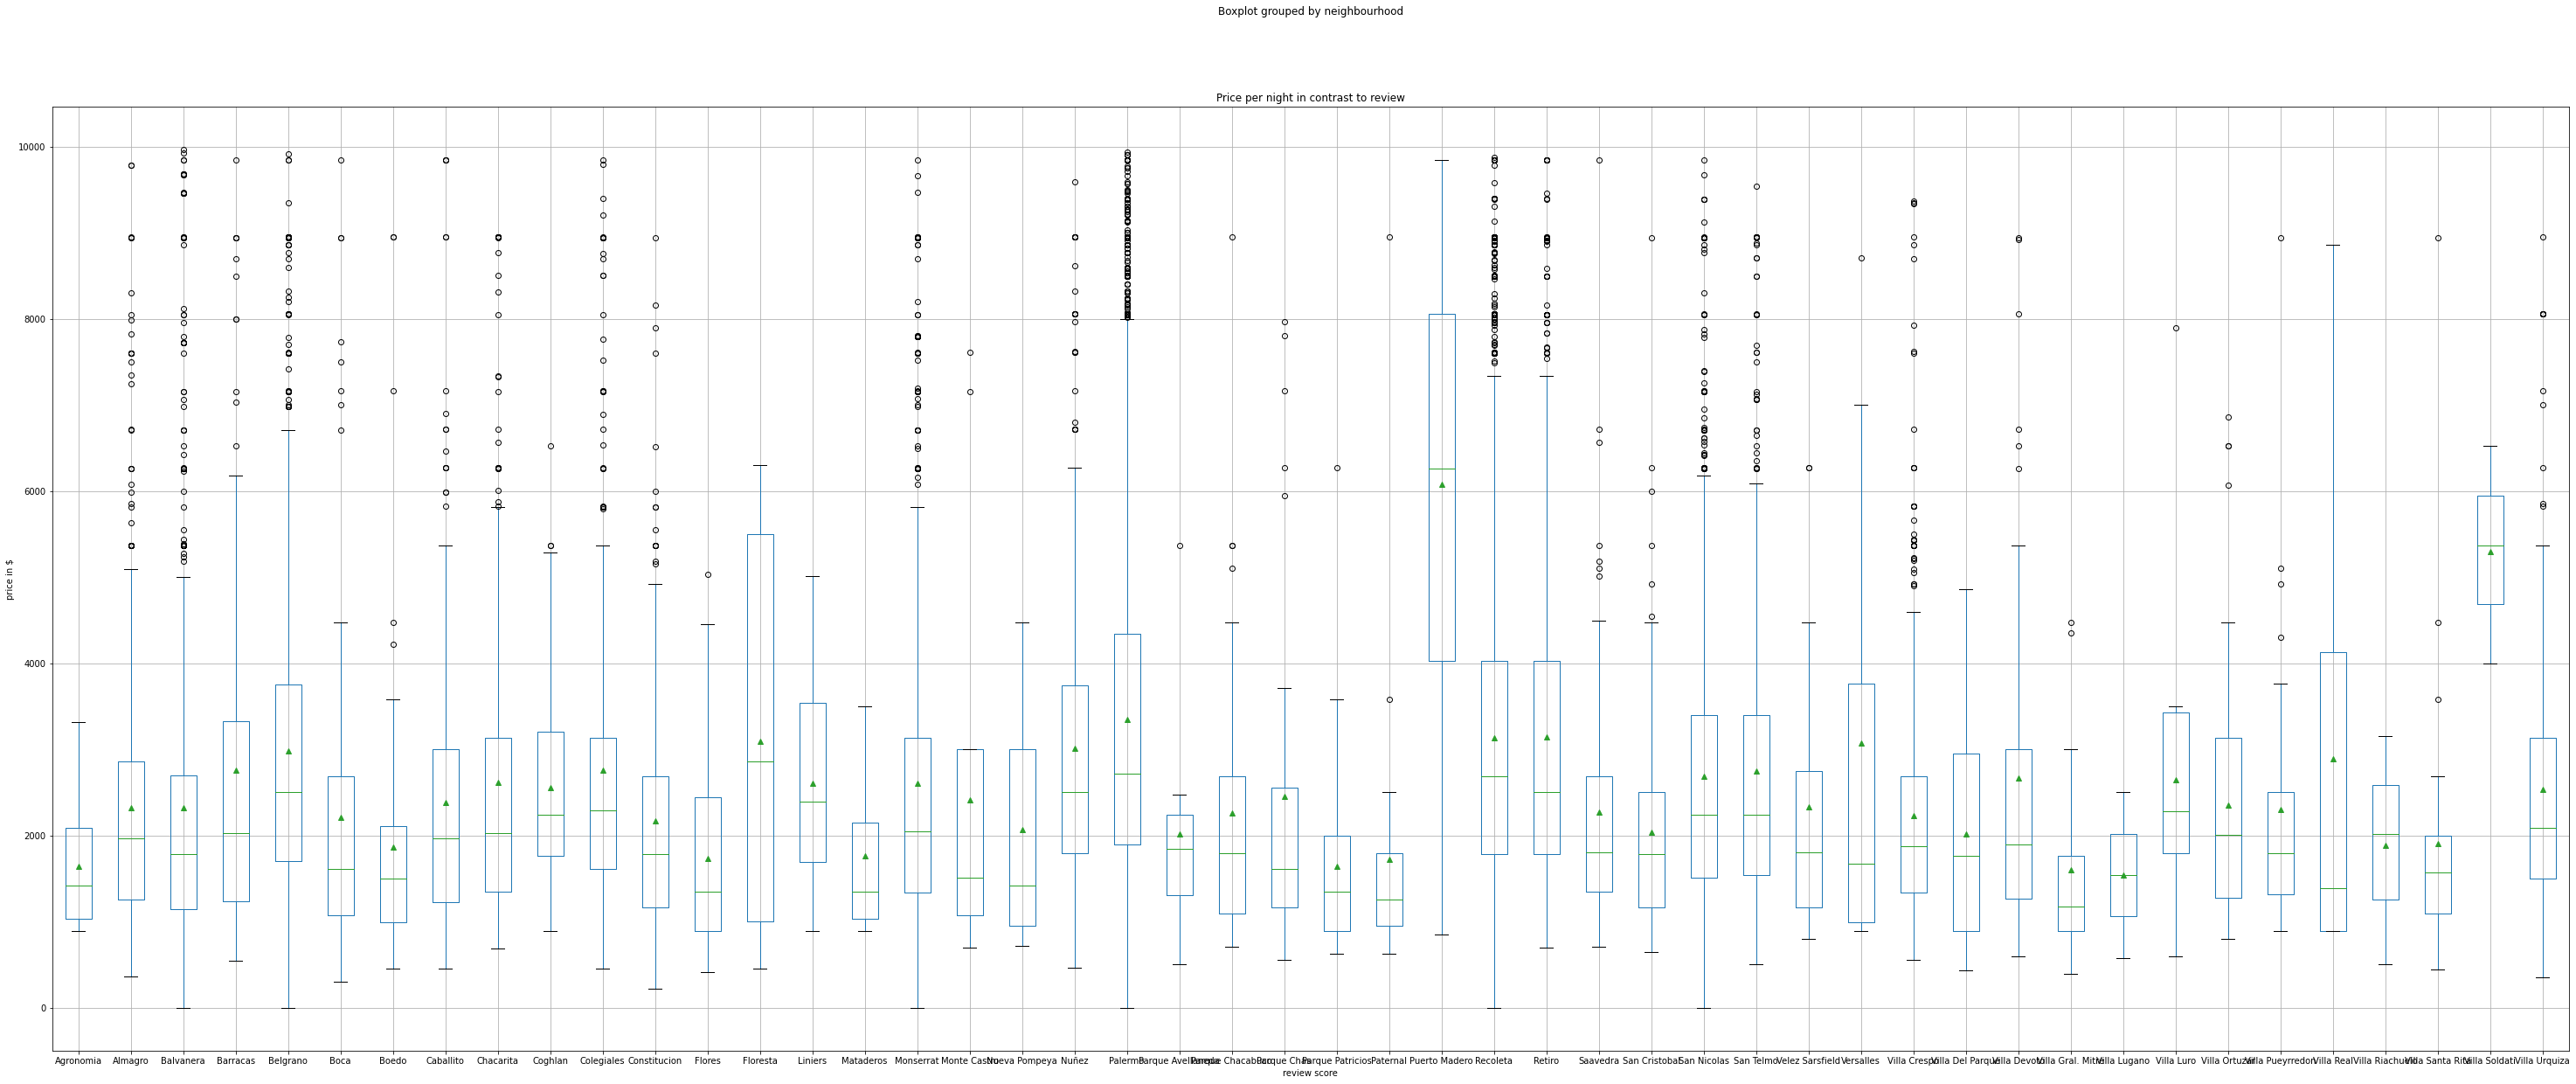

In [36]:

plt.figure(figsize=(19,19))
df_listings_without_outliers.boxplot(column = ["price"], by = ["neighbourhood"], figsize = (50,20), showmeans=True);
plt.title("Price per night in contrast to review");
plt.xlabel("review score");
plt.ylabel("price in $");

In [58]:
df_listings.groupby("neighbourhood").describe()["price"].sort_values(by=['50%'], ascending = False)[:10]

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Puerto Madero,229.0,8831.152838,6398.506189,850.0,4601.00,7783.0,10020.00,40258.0
Villa Soldati,3.0,5299.000000,1263.626131,4000.0,4686.50,5373.0,5948.50,6524.0
Floresta,28.0,3686.928571,2963.798263,450.0,1045.00,3000.0,5499.00,12190.0
Palermo,6258.0,5320.178332,26810.586043,0.0,1968.00,2955.0,4665.00,1244762.0
Villa Real,10.0,6198.100000,8200.816781,890.0,962.25,2725.0,7898.75,26864.0
Recoleta,3457.0,4644.536303,16198.740797,0.0,1789.00,2686.0,4473.00,616088.0
Retiro,1091.0,4807.438130,13625.485269,700.0,1789.00,2684.0,4473.00,257380.0
Liniers,16.0,3555.437500,3987.266498,890.0,1696.00,2674.5,3586.50,17820.0
Nuñez,373.0,4731.949062,23320.221426,460.0,1791.00,2507.0,4000.00,447731.0


In [38]:
df_listings_without_outliers.groupby("neighbourhood").describe()["price"].sort_values(by=['mean'], ascending = False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Puerto Madero,171.0,6079.935673,2409.267404,850.0,4026.00,6262.0,8059.00,9841.0
Villa Soldati,3.0,5299.000000,1263.626131,4000.0,4686.50,5373.0,5948.50,6524.0
Palermo,5838.0,3349.584961,1993.370406,0.0,1900.00,2719.0,4345.00,9940.0
Retiro,1029.0,3148.143829,1994.764005,700.0,1781.00,2505.0,4026.00,9841.0
Recoleta,3244.0,3134.876387,1934.541900,0.0,1789.00,2684.0,4026.00,9877.0
Floresta,26.0,3097.884615,2092.298933,450.0,1005.00,2860.5,5499.00,6299.0
Versalles,8.0,3076.625000,3051.924495,890.0,996.25,1673.0,3764.50,8706.0
Nuñez,361.0,3015.213296,1810.130966,460.0,1791.00,2500.0,3741.00,9594.0
Belgrano,825.0,2986.420606,1856.818055,0.0,1700.00,2500.0,3757.00,9918.0


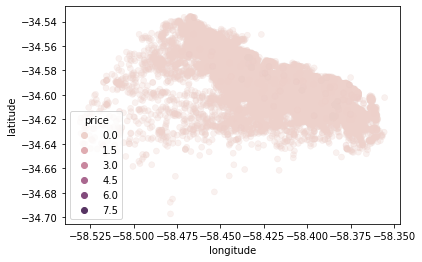

In [39]:
sns.scatterplot(x='longitude',y='latitude',data=df_listings,hue='price',alpha=0.3,edgecolor=None)

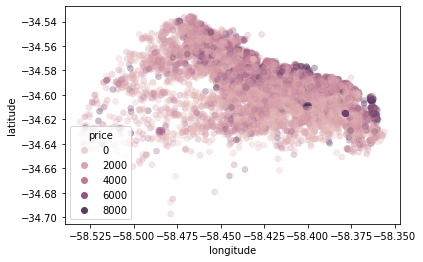

In [40]:
sns.scatterplot(x='longitude',y='latitude',data=df_listings_without_outliers,hue='price',alpha=0.3,edgecolor=None)

With the original dataset it's impossible to identify the expensive places. 

In [41]:
expansive_df=df_listings_without_outliers[(df_listings_without_outliers['longitude']>-58.375) & (df_listings_without_outliers['longitude']<-58.35)].sort_values('price',ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


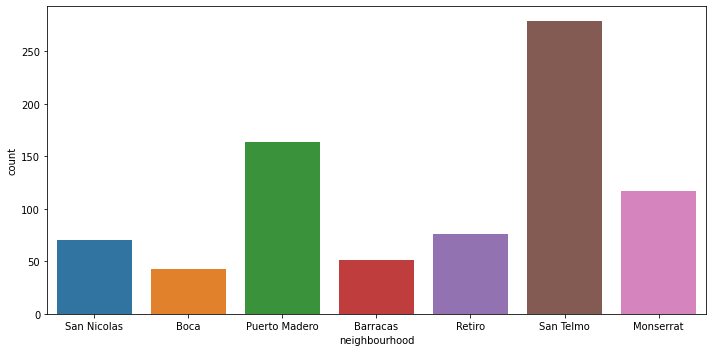

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(expansive_df['neighbourhood'].head(800))
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


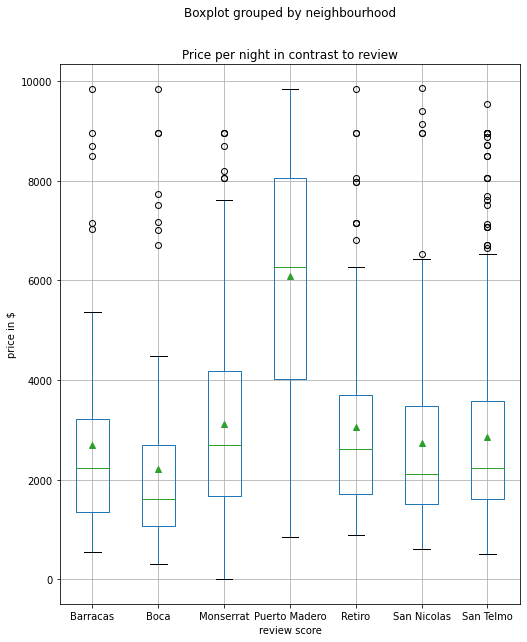

In [43]:
expansive_df.boxplot(column = ["price"], by = ["neighbourhood"], figsize = (8,10), showmeans=True);
plt.title("Price per night in contrast to review");
plt.xlabel("review score");
plt.ylabel("price in $");

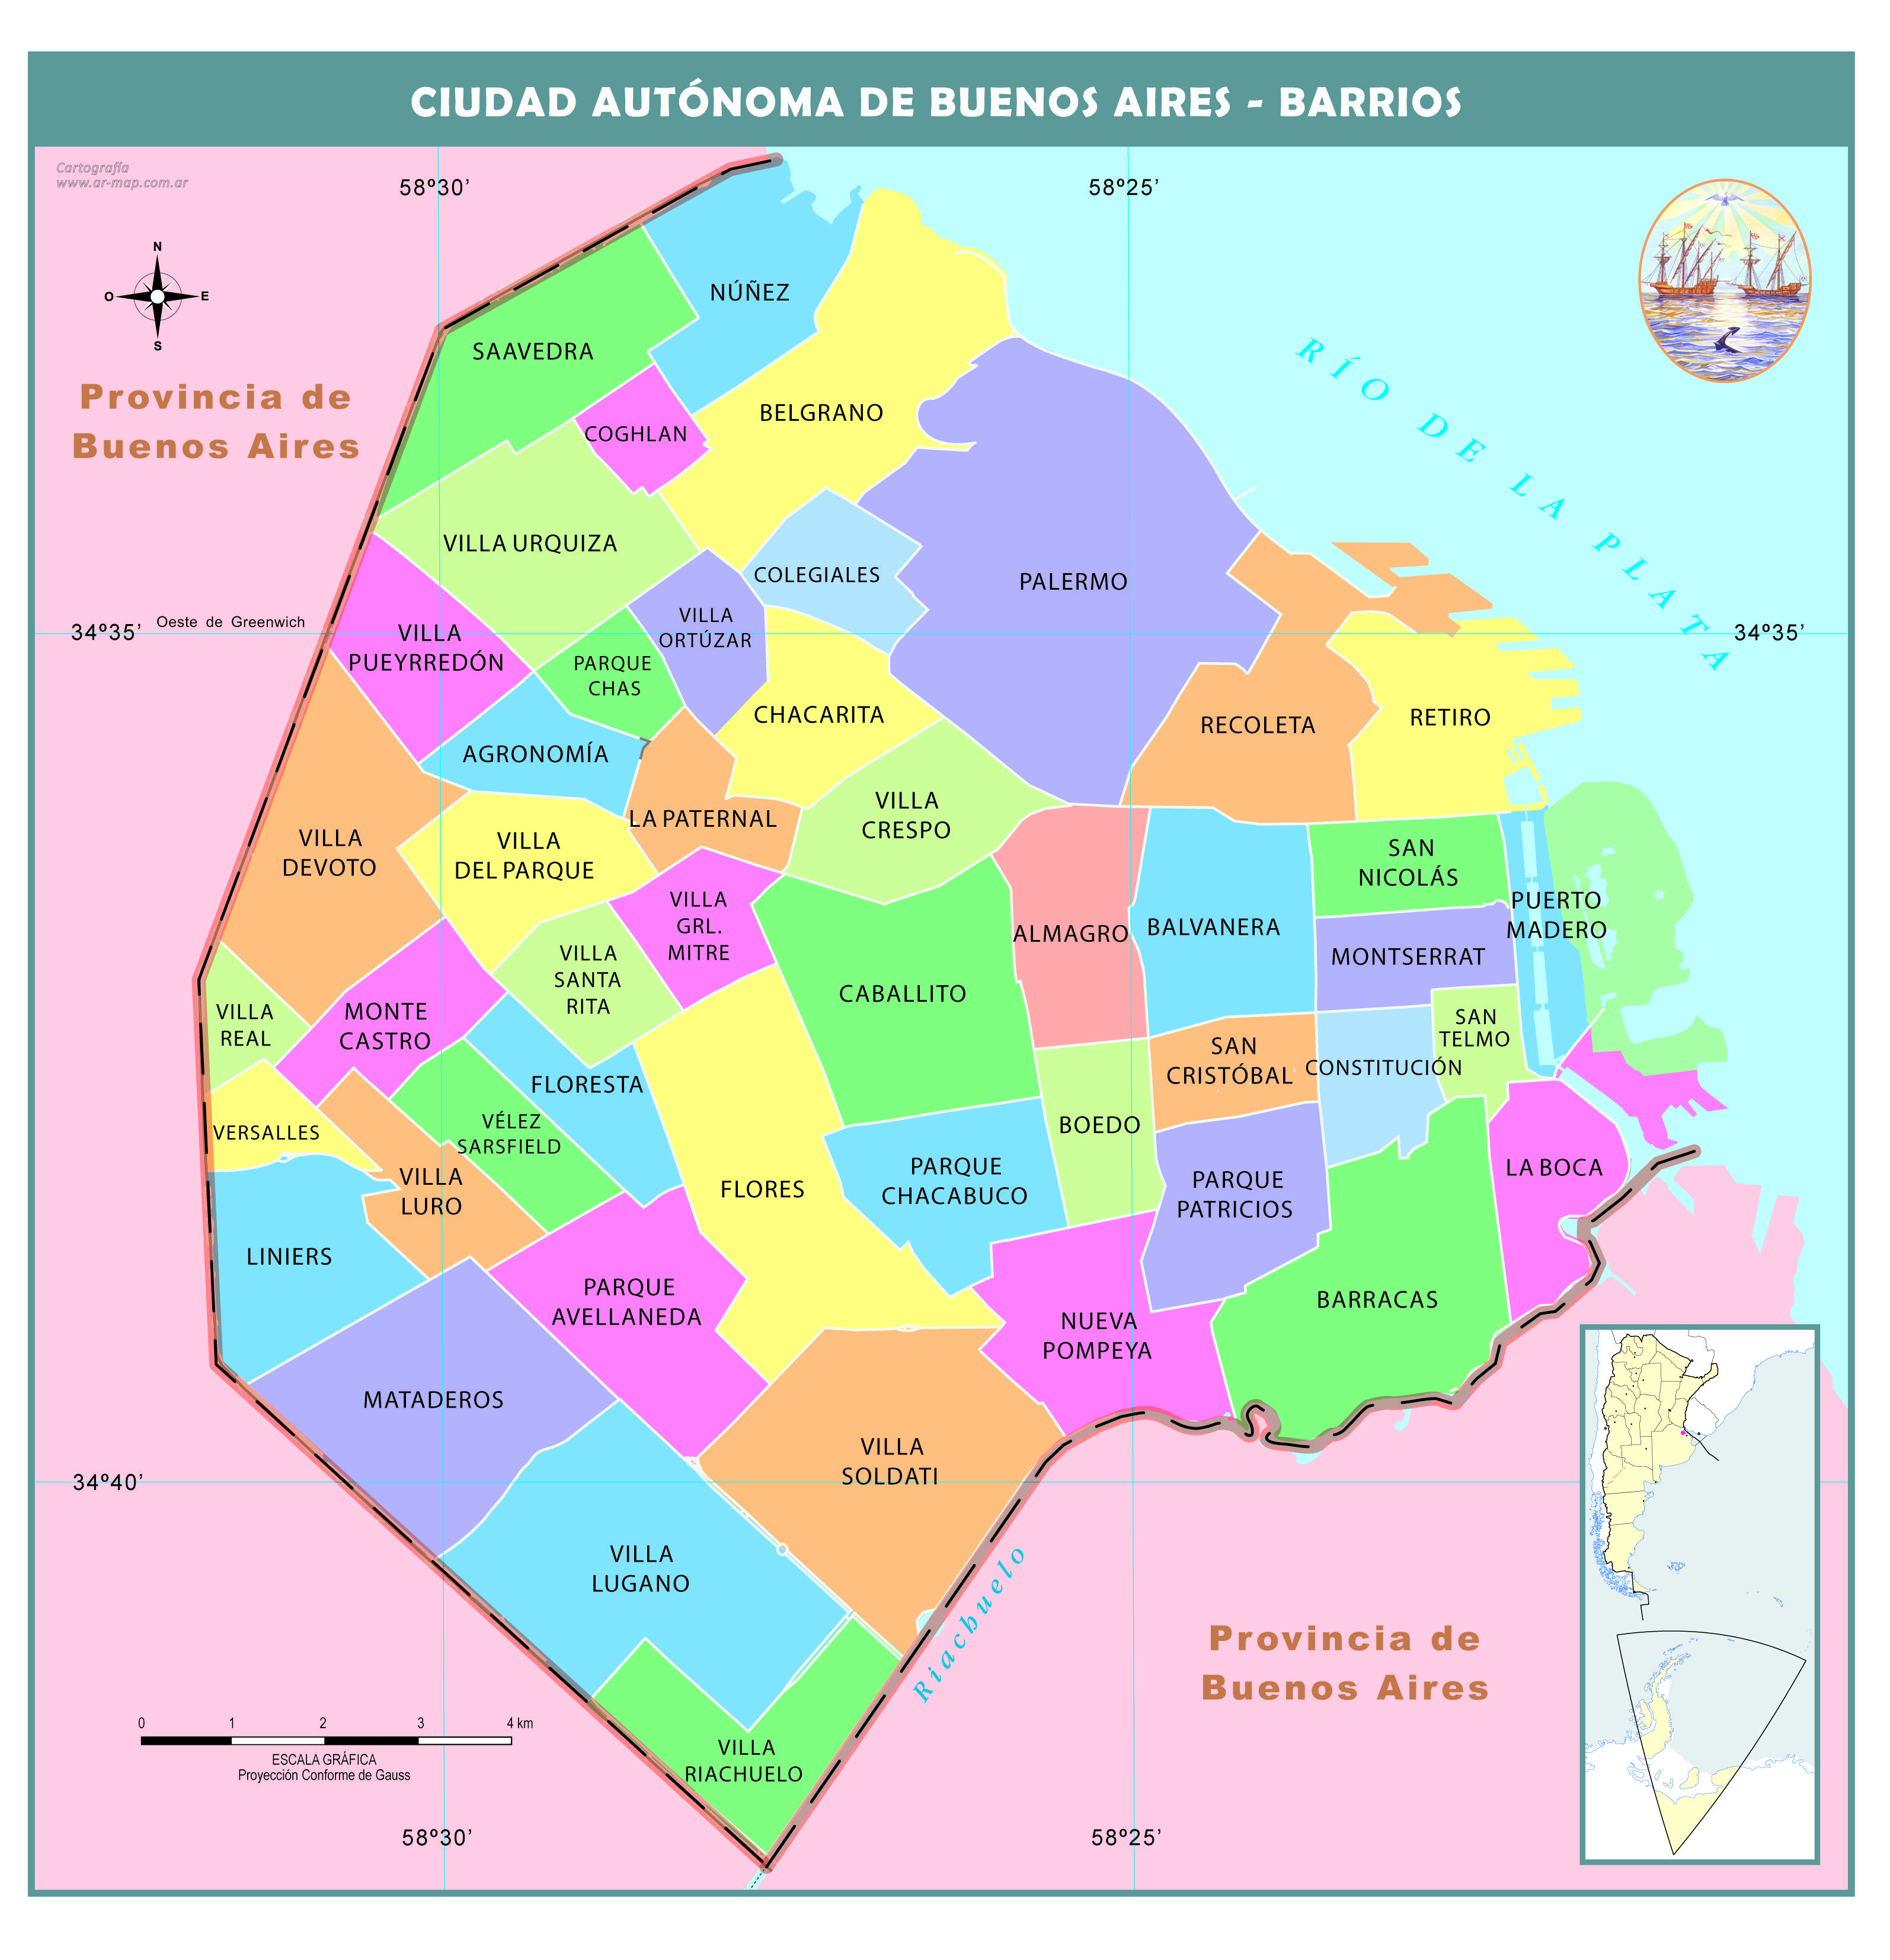

In [44]:
from IPython.display import Image
Image(filename=path+ '/images/buenos_aires_map.jpg') 

Repair how we have the same form in both maps.

**Answer:** 

Based on a dataset clean of outliers, answering the question about location, it’s clear that the longitude between -58.375 and -58.350 have the most expensive places.

Beyond that, there's a lot of concentration of places to travel on Airbnb at the coast. Puerto Madero and Vila Soldati are almost the double media than the others.

Instead San Telmo appears with the most occurences neigborood, but when the analysis is with mean, is down, besides that, has some outliers. Another interisting case is of San Nicolas, that have one outlier with the price of 8946021.0. According with this examples, it's complicated uses always the mean for analysing, sometimes is good look at a table as command 37, that order the values based on the high 50% values.

## 5. What's the best period of the year to travel to Buenos Aires?

**It's important to remember that prices in the future are just the prices now. But, they can change along the year for more or less.**

In [45]:
df_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6283,2021-02-24,t,4473.0,4473.0,3.0,30.0
1,53097,2021-02-24,f,3578.0,3578.0,2.0,1125.0
2,53097,2021-02-25,f,3578.0,3578.0,2.0,1125.0
3,53097,2021-02-26,f,3578.0,3578.0,2.0,1125.0
4,53097,2021-02-27,f,3578.0,3578.0,2.0,1125.0
...,...,...,...,...,...,...,...
7389037,48278756,2022-02-19,t,2990.0,2990.0,2.0,1125.0
7389038,48278756,2022-02-20,t,2980.0,2980.0,2.0,1125.0
7389039,48278756,2022-02-21,t,2980.0,2980.0,2.0,1125.0
7389040,48278756,2022-02-22,t,2980.0,2980.0,2.0,1125.0


In [46]:
calendar_columns = list(df_calendar.columns)

In [47]:
df_calendar_without_outliers = pd.merge(df_calendar, df_listings_without_outliers, how='inner', left_on=['listing_id'], right_on = ['id'], suffixes=('', '_right'))
df_calendar_without_outliers = df_calendar_without_outliers[calendar_columns]

Removing all outliers as the "listings.csv".

In [48]:
print('We have', df_calendar_without_outliers.date.nunique(), 'days and', df_calendar_without_outliers.listing_id.nunique(), 'unique listings in the calendar data.')

We have 369 days and 19179 unique listings in the calendar data.


In [49]:
print('The dataset have value of this period {}: '.format(df_calendar_without_outliers.date.min(), df_calendar_without_outliers.date.max()))

The dataset have value of this period 2021-02-23: 


In [50]:
df_calendar_without_outliers.available.value_counts()

t    4546660
f    2454355
Name: available, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


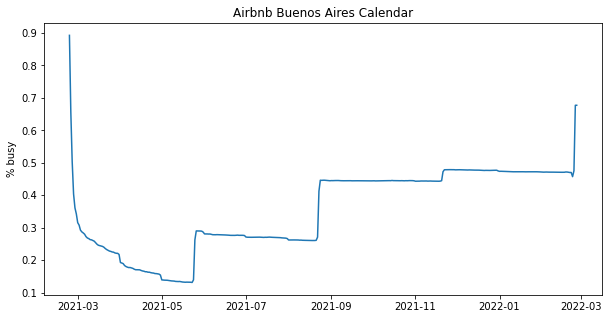

In [51]:
calendar_new = df_calendar_without_outliers[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb Buenos Aires Calendar')
plt.ylabel('% busy')
plt.show();

Above, we have the rate of occupation. Note that the current month is high. But, it's interesting that in May, the rate is very low, in comparision with another months.

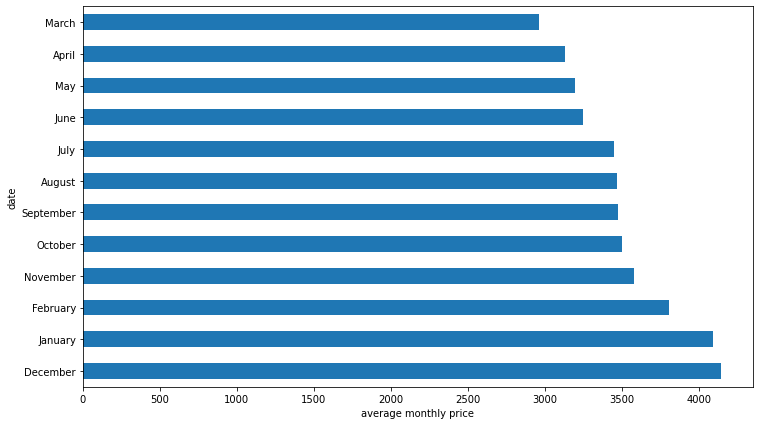

In [52]:
df_calendar_without_outliers['date'] = pd.to_datetime(df_calendar_without_outliers['date'])
mean_of_month = df_calendar_without_outliers.groupby(df_calendar_without_outliers['date'].dt.strftime('%B'), sort=False)['price'].mean().sort_values(ascending = False)

mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');

<Figure size 864x504 with 0 Axes>

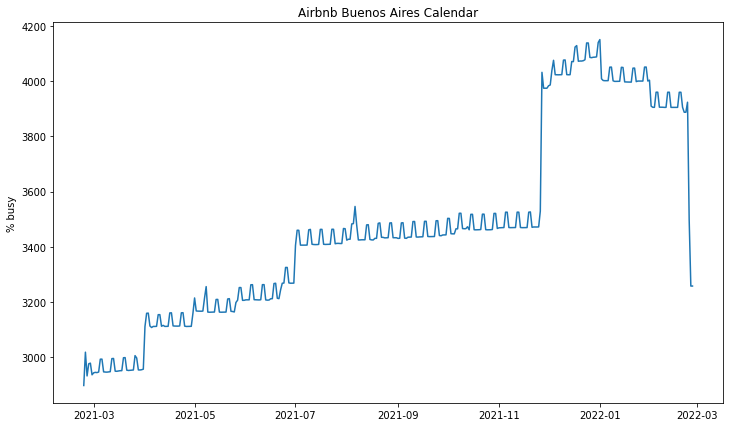

In [53]:
plt.figure(figsize = (12, 7))
calendar_new = df_calendar_without_outliers[['date', 'adjusted_price']]
calendar_new = calendar_new.groupby('date')['adjusted_price'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(12, 7))
plt.plot(calendar_new['date'], calendar_new['adjusted_price'])
plt.title('Airbnb Buenos Aires Calendar')
plt.ylabel('% busy')
plt.show();

The plot above shows some valleys and peaks, probably it's is the weekends. Let's check it and bring the mean price of month to make the analysis easier.

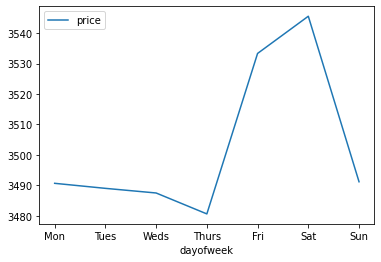

In [54]:
df_calendar_without_outliers['dayofweek'] = df_calendar_without_outliers.date.dt.day_name()

calendar = df_calendar_without_outliers[['dayofweek', 'price', 'date']]
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.plot()
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);

As it had mentioned before, the peaks are the weekends. On Saturday's the price is about 60$ more than Thursday's.

In [55]:
# create a list for the correct ordering of the month since now 

def get_order_list():
  #return the initial week
  firs_week = int(df_calendar_without_outliers.index.week[0])
  number_of_weeks = 52+1

  order_list = []
  
  for i in range(firs_week, number_of_weeks):
      order_list.append(i)
  for i in range(1, firs_week):
      order_list.append(i)

  return order_list



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  




Overall average price during the year: 3499.41 $




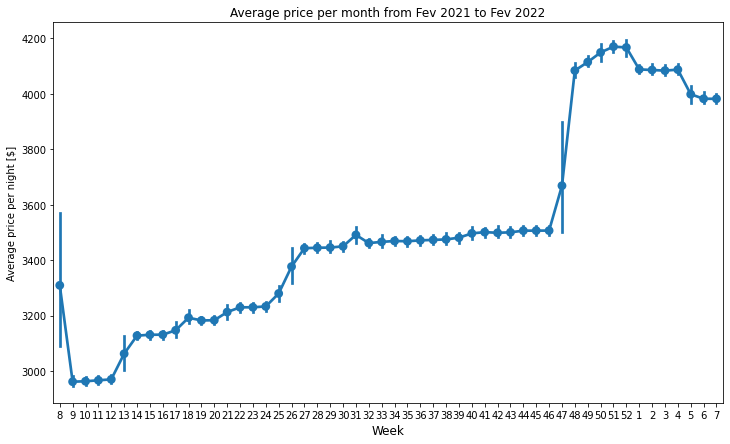

In [56]:
df_calendar_without_outliers = df_calendar_without_outliers.groupby(pd.Grouper(key = 'date',freq ='1D')).mean()

order_list = get_order_list()

plt.figure(figsize = (12, 7))
sns.pointplot(x = df_calendar_without_outliers.index.week, y = df_calendar_without_outliers["price"], order = order_list)
plt.title('Average price per month from Fev 2021 to Fev 2022')
plt.xlabel('Week', fontsize = 12)
plt.ylabel('Average price per night [$]')
plt.savefig(path+ "/images/price_per_month.png")
print("\n\nOverall average price during the year: {:.2f} $\n\n".format(np.mean(df_calendar_without_outliers.price)))

With the analysis of the month of february, this month is the cheaper one. But, it's important to pay attention if it's cheaper because it always like this or if it was because of the snapshot of this current month that influenced this result.